In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
from tqdm import tqdm

Defining keyboard coordinates and keys

In [2]:
def plot_keyboard(keys):
    fig,ax= plt.subplots(figsize=(13,5))
    ax.scatter(coords[1],1-coords[0],color='black',marker='s',lw=50)
    ax.scatter(coords[1],1-coords[0],color='white',marker='s',lw=40)
    for n,i in enumerate(keys):
        ax.text(coords[1][n],1-coords[0][n],i.upper(),fontsize=30,verticalalignment='center',horizontalalignment='center')
    ax.set_xlim(-1,10)
    ax.set_ylim(-2,2)
    plt.axis('off')
    plt.show()

In [3]:
keys_coords = {}
keys_coords[0] = {i:np.array([0,i]) for i in range(10)}
keys_coords[1] = {i:np.array([1,i+0.25]) for i in range(10)}
keys_coords[2] = {i:np.array([2,i+0.75]) for i in range(9)}
coords = np.array(sum([list(i.values()) for i in list(keys_coords.values())],[])).T
qwerty_keys = [i for i in 'qwertyuiopasdfghjklçzxcvbnm,.']

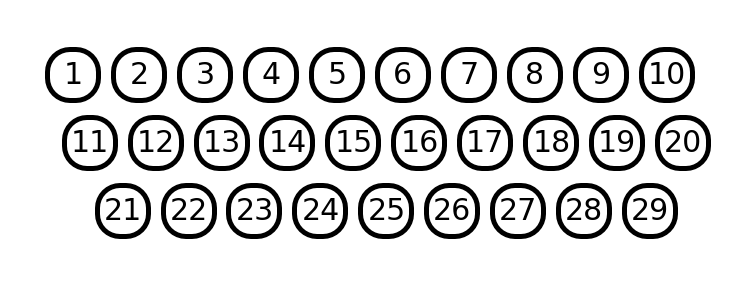

In [4]:
plot_keyboard([str(i) for i in range(1,len(qwerty_keys)+1)])

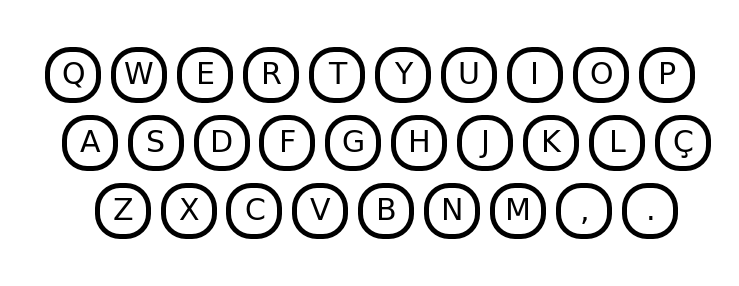

In [5]:
plot_keyboard(qwerty_keys)

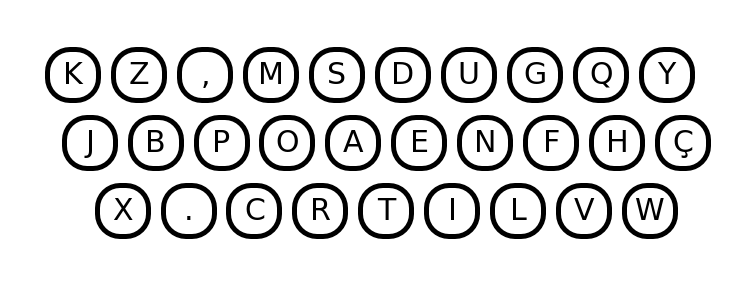

In [111]:
plot_keyboard(best_key)

---

In [142]:
text = pd.read_csv('../data/b2w.csv')
text = ' '.join(text['review_text_processed'].tolist())
text = [i for i in text if i in 'qwertyuiopasdfghjklçzxcvbnm,.']
text = ''.join(text)
text = list(zip(text, text[1:]))
text = pd.Series(text)
text = text.value_counts()

In [151]:
text = pd.read_csv('../data/buscape.csv')
text = ' '.join(text['review_text_processed'].astype(str).tolist())
text = [i for i in text if i in 'qwertyuiopasdfghjklçzxcvbnm,.']
text = ''.join(text)
text = list(zip(text, text[1:]))
text = pd.Series(text)
text = text.value_counts()

In [152]:
def get_points(keyboard):
    conversion = pd.Series(dict(zip(keyboard, coords.T)))
    a = pd.DataFrame(np.array([list(i) for i in text.index.tolist()]))
    return (text.values * (a[0].apply(lambda i: conversion[i]) -
                           a[1].apply(lambda i: conversion[i])).apply(
                               np.linalg.norm).values).sum()

def mutation(key):
    key = np.array([i for i in key])
    change = random.sample(range(len(qwerty_keys)), int(len(qwerty_keys)*mutation_proportion))
    key[change] = np.array(random.sample(key[change].tolist(),int(len(qwerty_keys)*(mutation_proportion))))
    return ''.join(key)



100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [04:39<00:00,  2.79s/it]


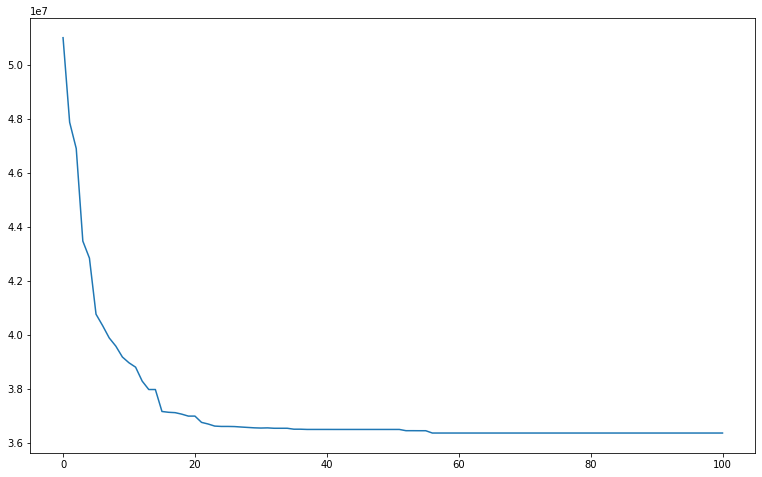

In [153]:
mutation_proportion = 3/29
top_best_keys = 10
generation_size = 200
generations = 100

generation = pd.Series([random.sample(qwerty_keys,len(qwerty_keys)) for i in range(generation_size)])
generation = generation.apply(lambda i: ''.join(i))
generations_history = [generation]
stats = [generation.apply(get_points).agg(['min','mean'])]
for i in tqdm(range(generations)):
    generation = pd.Series(int(generation_size/top_best_keys)*generation[generation.apply(get_points).sort_values().index[:top_best_keys]].values.tolist())
    generation = generation.apply(mutation)
    generations_history.append(generation)
    stats.append(generation.apply(get_points).agg(['min','mean']))
stats = pd.concat([pd.DataFrame(i).T for i in stats])
stats.index = range(stats.shape[0])

df_generations = pd.DataFrame(generations_history)
best_key = df_generations.T.iloc[df_generations.iloc[stats['min'].argmin()].apply(get_points).argmin(),stats['min'].argmin()]

fig,ax= plt.subplots(figsize=(13,8))
ax.plot(stats['min'])

---

### Best keyboard

In [134]:
best_key

'kb.prtnfzyj,moaeivxçqgudsclhw'

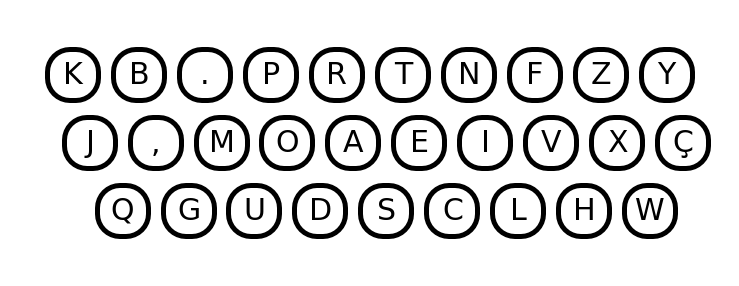

In [133]:
plot_keyboard(best_key)

In [117]:
'{:,}'.format(int(get_points(best_key))).replace(',','.')

'29.823.387'